
# Introducción al Aprendizaje Automático (ML) — SVM + `fit`/`predict`

**Objetivos**
- Comprender el flujo básico del **aprendizaje supervisado**.
- Entender las funciones **`fit()`** (entrenar) y **`predict()`** (predecir).
- Entrenar **SVM** (*Support Vector Machine*) en datasets introductorios: **Iris** y **Breast Cancer**.
- Mantener el **ejemplo SVM de género** (altura, peso, talla) como caso educativo y ético.



## 1) Marco conceptual: `fit()` y `predict()`

**Aprendizaje supervisado**: el modelo aprende a partir de ejemplos **con etiqueta** (X, y).  
Flujo típico:
1. **Entrenar** con datos conocidos → `fit(X_train, y_train)`  
2. **Predecir** en datos nuevos → `predict(X_test)`  
3. (más adelante) **Evaluar** el rendimiento con métricas.

**SVM (Support Vector Machine)**: busca una **frontera de separación** que maximiza el margen entre clases.



## 2) SVM con **Iris** (clasificación multiclase)


In [1]:

from sklearn import datasets, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1) Cargar Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 2) Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# 3) Modelo SVM lineal
svm_iris = svm.SVC(kernel='linear')  # SVM de margen duro/blando con kernel lineal
svm_iris.fit(X_train, y_train)       # ENTRENAR (fit)

# 4) Predicción
y_pred = svm_iris.predict(X_test)    # PREDECIR (predict)

print("Accuracy (Iris, SVM lineal):", accuracy_score(y_test, y_pred))


Accuracy (Iris, SVM lineal): 1.0



### (Opcional) Visualización 2D de la frontera de decisión
Para visualizar la separación, usamos solo dos características (ej. largo y ancho del sépalo).


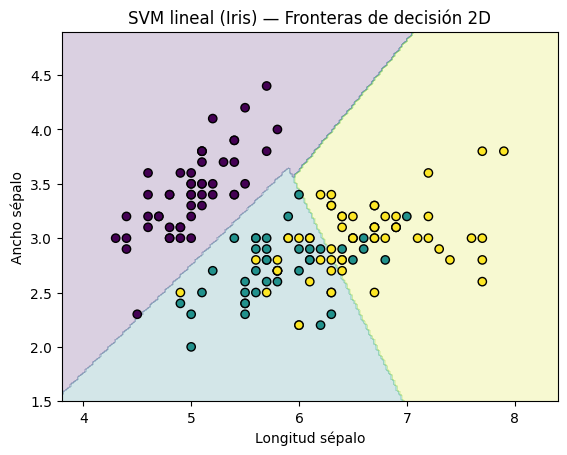

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Tomamos solo dos características para graficar
X2 = X[:, :2]   # sepal length, sepal width
y2 = y

svm_2d = svm.SVC(kernel='linear')
svm_2d.fit(X2, y2)

# Malla para pintar la frontera
xx, yy = np.meshgrid(
    np.linspace(X2[:,0].min()-0.5, X2[:,0].max()+0.5, 200),
    np.linspace(X2[:,1].min()-0.5, X2[:,1].max()+0.5, 200)
)
Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.2)
plt.scatter(X2[:,0], X2[:,1], c=y2, edgecolors='k')
plt.title("SVM lineal (Iris) — Fronteras de decisión 2D")
plt.xlabel("Longitud sépalo")
plt.ylabel("Ancho sépalo")
plt.show()



## 3) SVM con **Breast Cancer** (binaria: benigno/maligno)
Dataset realista de `scikit-learn` con 30 características. Útil para ver un caso sanitario (con cuidado ético).


In [3]:

from sklearn.datasets import load_breast_cancer
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# 1) Cargar datos
cancer = load_breast_cancer()
Xc = cancer.data
yc = cancer.target  # 0 = malignant, 1 = benign

# 2) Train/Test split
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    Xc, yc, test_size=0.25, random_state=42, stratify=yc
)

# 3) SVM lineal
svm_bc = svm.SVC(kernel='linear', C=1)
svm_bc.fit(Xc_train, yc_train)           # fit

# 4) Predicción + evaluación sencilla
yc_pred = svm_bc.predict(Xc_test)        # predict
print("Accuracy (Breast Cancer, SVM lineal):", accuracy_score(yc_test, yc_pred))
print(classification_report(yc_test, yc_pred, target_names=cancer.target_names))


Accuracy (Breast Cancer, SVM lineal): 0.951048951048951
              precision    recall  f1-score   support

   malignant       0.98      0.89      0.93        53
      benign       0.94      0.99      0.96        90

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143




## 4) Ejemplo SVM **género (M/F)** por altura, peso y talla (educativo)

> ⚠️ **Nota ética/didáctica**: usamos **datos sintéticos** y la etiqueta es **sexo biológico** (0/1).  
> En la realidad, estas variables **no determinan** el sexo/género y hay **solapamiento** y **sesgos**.  
> Úsalo solo para entender `fit`/`predict` y discutir limitaciones.


In [ ]:

from sklearn import svm

# Datos de entrenamiento (muy pocos, solo educativos): [altura_cm, peso_kg, talla_UK]
Xg = [
    [178, 70, 9],
    [189, 88, 11],
    [179, 65, 8],
    [160, 55, 7],
]
yg = [0, 0, 1, 1]  # 0: Masculino, 1: Femenino

clf_gender = svm.SVC(kernel='linear')
clf_gender.fit(Xg, yg)  # ENTRENAMIENTO

# Predicción para un nuevo ejemplo
print("Pred (160,60,7):", clf_gender.predict([[160, 60, 7]]))  # 0=M, 1=F
print("Pred (185,80,10):", clf_gender.predict([[185, 80, 10]]))



## 5) Ejercicios propuestos

**Iris**
1. Cambia el `kernel` de SVM (`'linear'`, `'rbf'`, `'poly'`) y observa diferencias.
2. Modifica el `test_size` (0.2, 0.3, 0.4). ¿Varía la precisión? Explica.
3. Cambia a dos características diferentes para visualizar la frontera 2D.

**Cáncer de mama**

4. Cambia `C` (0.1, 1, 10). ¿Qué ocurre con el informe de clasificación?
5. Calcula aciertos/fallos totales:  
   ```python
   (yc_pred == yc_test).sum(), (yc_pred != yc_test).sum()
   ```

**Género (educativo)**

6. Añade más ejemplos y vuelve a entrenar:
    ```python
      X.extend([[175,72,9],[165,58,7]])
      y.extend([0,1])
      clf.fit(X,y)
    ```
7. Predice para [185, 80, 10] y [162, 55, 7]. ¿Qué sale? ¿Dónde crees que está “la frontera” entre las dos clases?
8. Dibuja Altura vs Peso con colores por clase para visualizar la separación.
9. Discusión: ¿límites y riesgos de usar modelos así en la vida real?
